In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

# GCaMP Analysis

Now that we can easily extract data from the GCaMP movies, how do we analyze it?

First we read in the data. This first looks in `indir` described below, finds all csv files, and loads them in. Then to make the conditions a little bit more readable, it filters all of the boilerplate off the names. Finally, it builds this into a large dataframe for us to play with.

In [54]:
indir = "/Volumes/Coatamer/Users/weinberz/UM Drive/Data/GCaMP-DOR/original"
csvs = []
for root, dirs, files in os.walk(indir):
    for file in files:
        if 'csv' in file:
            csvs.append(Path(root) / file)

data = {}

for csv in csvs:
    dat = pd.read_csv(csv, index_col=0)
    name = (csv.stem
            .replace('analysis','')
            .replace('Gcamp6f','')
            .replace('PC12','')
            .replace('_',' ')
            .replace('  ',' ')
            .strip())
    date = str(csv.parent.name).split(" ")[0]
    dat['date'] = date
    data[name] = dat

data = pd.concat(data, names=['condition']).reset_index(level=0).reset_index(drop=True)

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [55]:
np.unique(data['condition'])

array(['SNAP-DOR 10uM SNC80 55mM KCL', 'SNAP-DOR 1uL DMSO 55mM KCL',
       'SNAP-DOR NGF 100nM SNC80',
       'SNAP-DOR NGF 100uM ICI174864 100nM SNC80',
       'SNAP-DOR NGF 10uM CNA 100nM SNC80 1',
       'SNAP-DOR NGF 10uM CNA pre 100nM SNC80',
       'SNAP-DOR NGF 10uM CNA pre 10uM DADLE 55mM KCL',
       'SNAP-DOR NGF 10uM CNA pre 10uM SNC80 55mM KCL',
       'SNAP-DOR NGF 10uM NTI 1', 'SNAP-DOR NGF 10uM NTI 55mM KCL',
       'SNAP-DOR NGF 10uM SNC80 55mM KCL', 'SNAP-DOR NT 100nM SNC80',
       'SNAP-DOR NT 100uM ICI174864 100nM SNC80', 'SNAP-DOR NT 10uM CNA',
       'SNAP-DOR NT 10uM CNA 55mM KCL 1',
       'SNAP-DOR NT 10uM CNA pre 100nM SNC80',
       'SNAP-DOR NT 10uM DADLE 55mM KCL', 'SNAP-DOR NT 10uM NTI',
       'SNAP-DOR NT 10uM NTI 55mM KCL', 'SNAP-DOR NT 10uM SNC80 55mM KCL',
       'SNAP-DOR NT 1uL DMSO 55mM KCL', 'SNAP-DOR NT DMSO',
       'no receptor NT 10uM DADLE', 'no receptor NT 10uM DADLE 2',
       'no receptor NT 10uM SNC80'], dtype=object)

In [56]:
condition_info = {'pretreatment' : ['NT','NGF'],
                  'antagonist' : ['10uM NTI', '10uM CNA', '100uM ICI174864'],
                  'agonist' : ['10uM DADLE', '10uM SNC80', '100nM SNC80'],
                  'receptor' : ['no receptor', 'SNAP-DOR']}
condition_outputs = {}
for key in condition_info:
    condition_outputs[key] = []

for row in data.itertuples():
    current_cond = row.condition
    for key, values in condition_info.items():
        condition_outputs[key].append(next((value for value in values if value in current_cond), ''))
        
for key in condition_outputs:
    data[key] = condition_outputs[key]
    
data.loc[data['pretreatment'] == '', 'pretreatment'] = 'NT'
data.loc[data['agonist'] == '', 'agonist'] = 'DMSO'

In [39]:
data

,condition,area,cell,date,frame,primary_intden,primary_mean,secondary_intden,secondary_mean,pretreatment,antagonist,agonist,receptor
0,SNAP-DOR 10uM SNC80 55mM KCL,1625.0,1.0,20191003,0.0,239218.0,147.211077,265070.0,163.120000,NT,,10uM SNC80,SNAP-DOR
1,SNAP-DOR 10uM SNC80 55mM KCL,1572.0,2.0,20191003,0.0,220811.0,140.465013,237040.0,150.788804,NT,,10uM SNC80,SNAP-DOR
2,SNAP-DOR 10uM SNC80 55mM KCL,1637.0,1.0,20191003,1.0,241194.0,147.339035,264529.0,161.593769,NT,,10uM SNC80,SNAP-DOR
3,SNAP-DOR 10uM SNC80 55mM KCL,1569.0,2.0,20191003,1.0,219531.0,139.917782,240880.0,153.524538,NT,,10uM SNC80,SNAP-DOR
4,SNAP-DOR 10uM SNC80 55mM KCL,1626.0,1.0,20191003,2.0,244202.0,150.185732,263177.0,161.855474,NT,,10uM SNC80,SNAP-DOR
5,SNAP-DOR 10uM SNC80 55mM KCL,1559.0,2.0,20191003,2.0,220736.0,141.588198,238917.0,153.250160,NT,,10uM SNC80,SNAP-DOR
6,SNAP-DOR 10uM SNC80 55mM KCL,1768.0,1.0,20191003,3.0,260172.0,147.156109,293672.0,166.104072,NT,,10uM SNC80,SNAP-DOR
7,SNAP-DOR 10uM SNC80 55mM KCL,1608.0,2.0,20191003,3.0,226530.0,140.876866,243462.0,151.406716,NT,,10uM SNC80,SNAP-DOR
8,SNAP-DOR 10uM SNC80 55mM KCL,1740.0,1.0,20191003,4.0,257482.0,147.978161,288062.0,165.552874,NT,,10uM SNC80,SNAP-DOR
9,SNAP-DOR 10uM SNC80 55mM KCL,1515.0,2.0,20191003,4.0,214528.0,141.602640,235119.0,155.194059,NT,,10uM SNC80,SNAP-DOR


How's everything looking? This is equivalent to `geom_line` from ggplot.

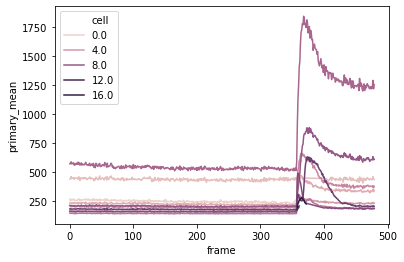

In [9]:
single_dat = pd.read_csv('/Volumes/Coatamer/Users/weinberz/UM Drive/Data/GCaMP-DOR/original/20191019 PC12 Gcamp/PC12_no receptor_Gcamp6f_NT_10uM DADLE_2_analysis.csv',
                         index_col=0)
g = sns.lineplot(data=single_dat,x='frame', y='primary_mean', hue='cell')

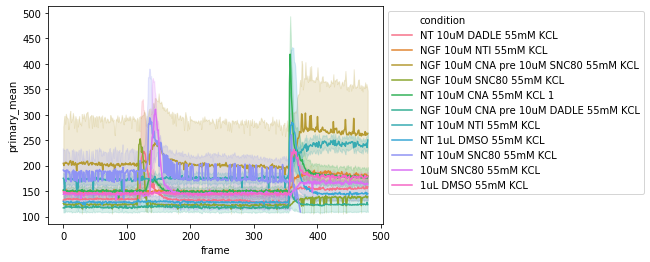

In [77]:
g = sns.lineplot(data=data,x='frame', y='primary_mean', hue='condition')
g.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

We can see there's obviously a lot of variability between conditions. It also looks like some conditions have more variability than we'd like. This is probably due to three issues:

- 'Cells' with many missing detections (probably noise)
- Non-normalized data
- Cells that are not expressing DOR but are expressing the sensor

The first two are easy to knock out. First, we get rid of all 'cells' that are not present for at least half of the movie:

In [57]:
print(len(data))
cutoff = 240
gcamp_cutoff = 130
cells_in_conditions = np.unique(data[['condition','cell']].to_records(index=False))

for condition, cell in cells_in_conditions:
    num_frames = len(data.loc[(data['condition'] == condition) &
                          (data['cell'] == cell), 'frame'])
    mean_gcamp = data.loc[(data['condition'] == condition) &
                          (data['cell'] == cell), 'primary_mean'].mean()
    if (num_frames <= cutoff) or (mean_gcamp < gcamp_cutoff):
        data = data.drop(data[(data['condition'] == condition) & 
                              (data['cell'] == cell)].index)
        print('Dropped cell %d in %s' % (cell, condition))

print(len(data))

59335
Dropped cell 3 in SNAP-DOR 10uM SNC80 55mM KCL
Dropped cell 4 in SNAP-DOR 10uM SNC80 55mM KCL
Dropped cell 5 in SNAP-DOR 10uM SNC80 55mM KCL
Dropped cell 1 in SNAP-DOR NGF 100nM SNC80
Dropped cell 2 in SNAP-DOR NGF 100nM SNC80
Dropped cell 3 in SNAP-DOR NGF 100nM SNC80
Dropped cell 5 in SNAP-DOR NGF 100nM SNC80
Dropped cell 6 in SNAP-DOR NGF 100nM SNC80
Dropped cell 13 in SNAP-DOR NGF 100nM SNC80
Dropped cell 6 in SNAP-DOR NGF 100uM ICI174864 100nM SNC80
Dropped cell 3 in SNAP-DOR NGF 10uM CNA 100nM SNC80 1
Dropped cell 7 in SNAP-DOR NGF 10uM CNA 100nM SNC80 1
Dropped cell 8 in SNAP-DOR NGF 10uM CNA 100nM SNC80 1
Dropped cell 1 in SNAP-DOR NGF 10uM CNA pre 100nM SNC80
Dropped cell 5 in SNAP-DOR NGF 10uM CNA pre 100nM SNC80
Dropped cell 6 in SNAP-DOR NGF 10uM CNA pre 100nM SNC80
Dropped cell 7 in SNAP-DOR NGF 10uM CNA pre 100nM SNC80
Dropped cell 9 in SNAP-DOR NGF 10uM CNA pre 100nM SNC80
Dropped cell 10 in SNAP-DOR NGF 10uM CNA pre 100nM SNC80
Dropped cell 11 in SNAP-DOR NGF 10uM

Then, for each cell, for each of the primary and secondary channel fluorescence, and for each of mean and integrated density of the intensity values, we normalize each cell against it's first 100 frames giving us a little extra breathing room befor drug is added.

In [58]:
cells_in_conditions = np.unique(data[['condition','cell']].to_records(index=False))
for normalization in ['primary_mean','primary_intden','secondary_mean', 'secondary_intden']:
    data[normalization + "_normalized"] = 0
    for condition, cell in cells_in_conditions:
        baseline = data.loc[(data['condition'] == condition) &
                          (data['cell'] == cell) &
                          (data['frame'] < 100), normalization]
        baseline = np.mean(baseline)
        normalized = data.loc[(data['condition'] == condition) &
                              (data['cell'] == cell), normalization].values / baseline
        data.loc[(data['condition'] == condition) &
                 (data['cell'] == cell), normalization + "_normalized"] = normalized

In [43]:
data.groupby(['agonist','pretreatment','antagonist','receptor'])['cell'].nunique()

agonist      pretreatment  antagonist       receptor   
             NT                             SNAP-DOR        5
                           10uM CNA         SNAP-DOR        3
                           10uM NTI         SNAP-DOR        6
100nM SNC80  NGF                            SNAP-DOR        7
                           100uM ICI174864  SNAP-DOR        5
                           10uM CNA         SNAP-DOR        7
             NT                             SNAP-DOR        8
                           100uM ICI174864  SNAP-DOR        5
                           10uM CNA         SNAP-DOR        3
10uM DADLE   NGF           10uM CNA         SNAP-DOR        2
             NT                             SNAP-DOR        3
                                            no receptor    10
10uM SNC80   NGF                            SNAP-DOR        3
                           10uM CNA         SNAP-DOR        5
             NT                             SNAP-DOR        3
              

How's that look?

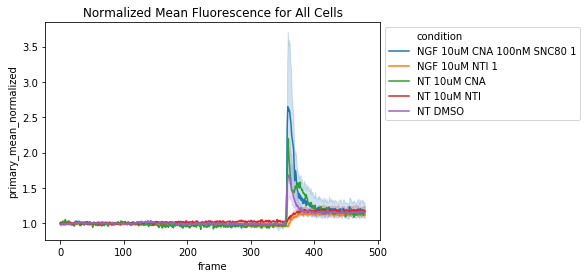

In [12]:
g = sns.lineplot(data=data,x='frame', y='primary_mean_normalized', hue='condition')
g.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.title('Normalized Mean Fluorescence for All Cells')
plt.show()

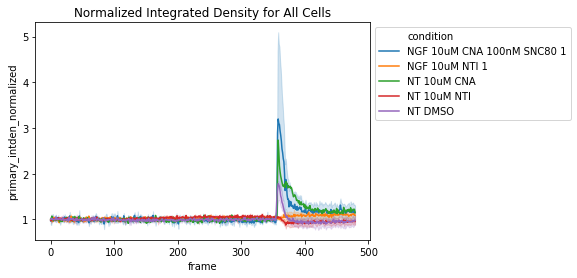

In [13]:
g = sns.lineplot(data=data,x='frame', y='primary_intden_normalized', hue='condition')
g.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.title('Normalized Integrated Density for All Cells')
plt.show()

Much cleaner! But we still have non-DOR cells in there. For each condition (which in this case is a different coverslip), we're going to normalize the DOR fluorescence (in the secondary channel) from min to max.

In [22]:
def normalize_01(array):
    max_val = np.max(array)
    min_val = np.min(array)
    
    array = (array - min_val) / (max_val - min_val)
    
    return array

data['normalized_dor_mean'] = 0
data['normalized_dor_intden'] = 0

for intensity in ['mean', "intden"]:
    for condition in np.unique(data['condition']):
        norm_intensity = normalize_01(data.loc[data['condition'] == condition,
                                               'secondary_' + intensity].values)
        data.loc[data['condition'] == condition, 'normalized_dor_' + intensity] = norm_intensity

We can look at the distribution of these normalized values to see where we should make a cutoff for DOR-positive or not:

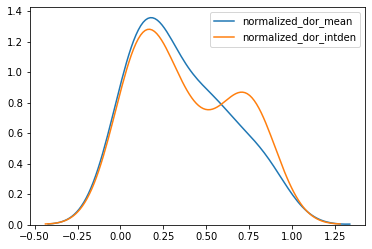

In [38]:
sns.kdeplot(data.groupby(['condition','cell'])['normalized_dor_mean'].median())
sns.kdeplot(data.groupby(['condition','cell'])['normalized_dor_intden'].median())

That's kinda cool! Seems like integrated density gives us a nice cutoff for high expressing vs low expressing cells. It seems like there's some variation in the high-end there, but a good chunk of cells with less than 0.2 DOR-expression exist so let's first try bifurcating on that.

In [41]:
data['dor_positive'] = False
cutoff = 0.05

for condition, cell in cells_in_conditions:
    dor = data.loc[(data['condition'] == condition) &
                   (data['cell'] == cell), 'normalized_dor_intden']
    dor = np.mean(dor) > cutoff
    data.loc[(data['condition'] == condition) &
             (data['cell'] == cell), "dor_positive"] = dor

What's our breakdown of DOR vs no-DOR cells per conditions?

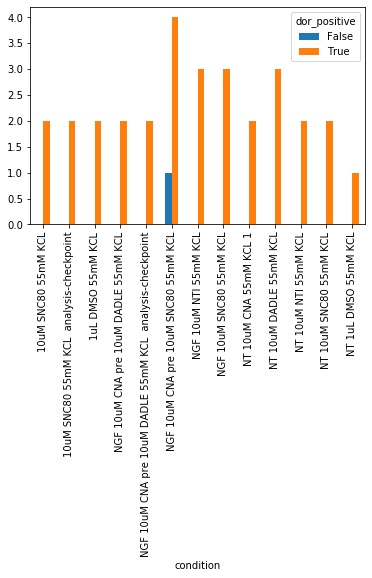

In [42]:
(data[['condition', 'cell', 'dor_positive']]
     .drop_duplicates()
     .groupby(['condition', 'dor_positive'])
     .count()
     .reset_index(level=1)
     .pivot(columns='dor_positive', values='cell')
     .plot.bar())

The `NT 10uM DADLE 55mM KCL` condition seems to have a split that we can play with, while also allowing us to expect some differences between the two. What's that look like in the plot from above?

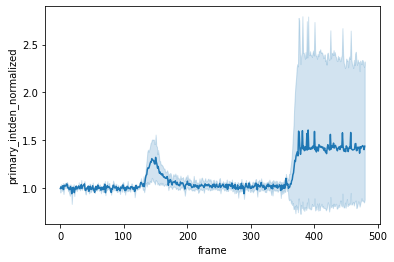

In [47]:
sns.lineplot(data = data[data['condition'] == 'NGF 10uM CNA pre 10uM SNC80 55mM KCL'],
             x = 'frame', y = 'primary_intden_normalized')

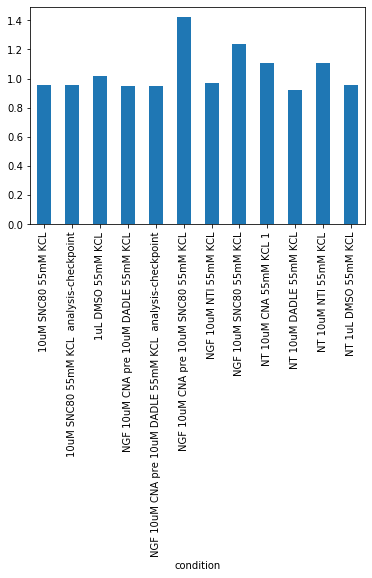

In [53]:
(data[(data['frame'] > 450)]
     .groupby('condition')['primary_intden_normalized']
     .mean()
     .plot.bar())

Hm - that's interesting...

Well, at the very least let's try this cutoff and see if we can't get things into Prism for 'easy' manipulation:

In [44]:
condition_cells = [' '.join([cell.condition, str(int(cell.cell))]) for cell in data[['condition','cell']].to_records()]

In [45]:
output = data.pivot_table(values='primary_intden_normalized', index='frame', columns=['condition','cell'])
output.columns = output.columns.droplevel(1)
output.to_csv('intden_by_time.csv')

In [46]:
output = data.pivot_table(values='primary_mean_normalized', index='frame', columns=['condition','cell'])
output.columns = output.columns.droplevel(1)
output.to_csv('mean_by_time.csv')

In [47]:
(data[(data['frame'] >100) & (data['frame'] < 200)]
 .pivot_table(values='primary_mean_normalized', index='cell', columns='condition', aggfunc=max)).to_csv('max_drug_mean.csv')

In [48]:
(data[(data['frame'] >100) & (data['frame'] < 200)]
 .pivot_table(values='primary_intden_normalized', index='cell', columns='condition', aggfunc=max)).to_csv('max_drug_intden.csv')

In [49]:
(data[(data['frame'] >300) & (data['frame'] < 400)]
 .pivot_table(values='primary_intden_normalized', index='cell', columns='condition', aggfunc=max)).to_csv('max_intden_kcl_spike.csv')
(data[(data['frame'] >300) & (data['frame'] < 400)]
 .pivot_table(values='primary_mean_normalized', index='cell', columns='condition', aggfunc=max)).to_csv('max_mean_kcl_spike.csv')

In [50]:
(data[(data['frame'] >430)]
 .pivot_table(values='primary_intden_normalized', index='cell', columns='condition', aggfunc=max)).to_csv('max_intden_kcl_plateau.csv')
(data[(data['frame'] >430)]
 .pivot_table(values='primary_mean_normalized', index='cell', columns='condition', aggfunc=max)).to_csv('max_mean_kcl_plateau.csv')

In [59]:
data.to_csv('all_data.csv')